In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR

import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import adfuller

In [13]:
#Lendo o arquivo
data = pd.read_csv('C:/_Academico/PUC/Ciência de Dados I/GE.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,68.009369,68.071815,64.949257,65.386414,64.746658,12801914
1,2021-01-05,65.136612,67.946915,65.074158,67.259956,66.601852,13402511
2,2021-01-06,67.634659,72.568306,67.634659,70.944572,70.250420,21069984
3,2021-01-07,72.193596,72.256050,70.195160,70.382515,69.693871,12055779
4,2021-01-08,70.507416,71.444183,69.695549,70.819672,70.126740,11644242


In [14]:
#Selecionando as variáveis que farão parte da previsão
data['Date'] = pd.to_datetime(data['Date'])

data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']]

In [15]:
#Informando que a periodicidade é diária
data.set_index('Date', inplace=True)
data.index = pd.DatetimeIndex(data.index).to_period('D') 

In [16]:
model = VAR(data)
results = model.fit()
print(results.params)

                  Open      High       Low     Close  Adj Close
const        -0.082501  0.539938 -0.165079  0.473288   0.471212
L1.Open      -0.016621  0.107591  0.063855  0.128069   0.128327
L1.High      -0.003020  0.015433 -0.295013 -0.160472  -0.159979
L1.Low        0.033160 -0.193846  0.149936 -0.058014  -0.059343
L1.Close      1.119589  1.114846  0.630658  0.720471  -0.279208
L1.Adj Close -0.132068 -0.040606  0.448528  0.367945   1.368218


In [17]:
# Faça previsões para os próximos 60 dias
forecast_steps = 60
forecast = results.forecast(data.values, steps=forecast_steps)

# Crie manualmente as datas de previsão para coincidir com o número de previsões
last_date = data.index.max()
last_date_timestamp = last_date.to_timestamp()  # Converter para Timestamp
forecast_index = pd.date_range(start=last_date_timestamp, periods=forecast_steps+1, closed='right')

# Crie um DataFrame com as previsões
forecast_df = pd.DataFrame(forecast, columns=data.columns, index=forecast_index)

# Imprima as previsões
print("Previsões:")
print(forecast_df)


Previsões:
                  Open        High         Low       Close   Adj Close
2023-09-30  110.519974  111.849572  109.547759  110.752495  110.754722
2023-10-01  110.745424  111.896312  109.843873  110.868990  110.873059
2023-10-02  110.866153  111.988958  110.015424  111.000657  111.006324
2023-10-03  110.999368  112.111499  110.164333  111.135195  111.142389
2023-10-04  111.134379  112.243322  110.304892  111.270948  111.279646
2023-10-05  111.270258  112.378405  110.442876  111.407240  111.417435
2023-10-06  111.406560  112.514711  110.580145  111.543852  111.555544
2023-10-07  111.543144  112.651564  110.717320  111.680713  111.693905
2023-10-08  111.679965  112.788741  110.854607  111.817800  111.832493
2023-10-09  111.817007  112.926169  110.992075  111.955104  111.971301
2023-10-10  111.954264  113.063824  111.129745  112.092624  112.110327
2023-10-11  112.091737  113.201697  111.267627  112.230359  112.249571
2023-10-12  112.229425  113.339787  111.405722  112.368309  112.38

In [18]:

# Calcule e exiba as estatísticas de avaliação do modelo
print("Estatísticas de Avaliação do Modelo:")
print("AIC (Critério de Informação Akaike):", results.aic)
print("BIC (Critério de Informação Bayesiano):", results.bic)


Estatísticas de Avaliação do Modelo:
AIC (Critério de Informação Akaike): -11.798301561405962
BIC (Critério de Informação Bayesiano): -11.600830969054135


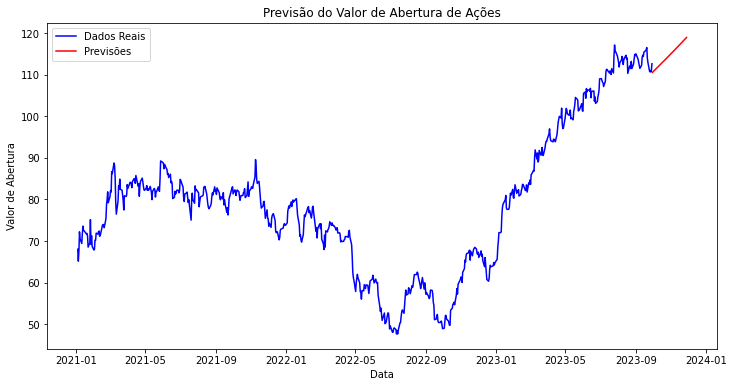

In [19]:
# Converter o índice do DataFrame data para Timestamp
data.index = data.index.to_timestamp()

# Plote os dados reais e as previsões em um único gráfico
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Open'], label='Dados Reais', color='blue')
plt.plot(forecast_df.index, forecast_df['Open'], label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.legend()
plt.title('Previsão do Valor de Abertura de Ações')
plt.show()
